In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# The k-means algorithm

**Contents**

- [k-means step-by-step example](#1.-k-means-steps-by-step-example)
- [k-means implementation](#2.-k-means-implementation)
- [Inertia and other metrics](#3.-Inertia-and-other-cluster-metrics)
- [Finding the optimal number of clusters: the elbow method](#4.-Finding-the-optimal-number-of-clusters:-the-elbow-method)
- [Demonstration of k-means assumptions](#5.-Demonstration-of-k-means-assumptions)

## 1. k-means steps-by-step example

Consider the following unlabeled dataset

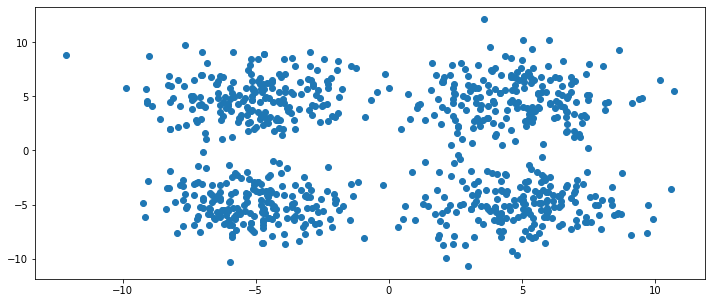

In [2]:
'four-blobs dataset'
X = np.zeros((800,2)) #2 features; 400 data points
X[0:200] =   2*np.random.randn(200,2) + [-5,5] # blob 1
X[200:400] = 2*np.random.randn(200,2) + [5,-5] # blob 2
X[400:600] = 2*np.random.randn(200,2) + [5,5] # blob 3
X[600:800] = 2*np.random.randn(200,2) + [-5,-5]

'plot dataset'
plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

We can clearly see four blobs (clusters). 
The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly.

First, we have to specify the number of clusters k that the algorithm must find. 
In this example, it is pretty obvious from looking at the data that $k$ should be set to 4. 
In general, choosing k is not that easy. 
We will discuss this shortly.

In [3]:
# number of clusters
k = 4 

**Initialization:** We randomly sample k points from the dataset. 
These are the initial k means (cluster centers).

In [4]:
m = X.shape[0] # number of data points
means = X[np.random.choice(m,k,replace=False)] # initial k means

In [5]:
means

array([[ 7.30867105, -3.08656473],
       [ 5.89327311,  5.40887247],
       [-5.06861997, -6.06040926],
       [-3.18545657, -2.47102866]])

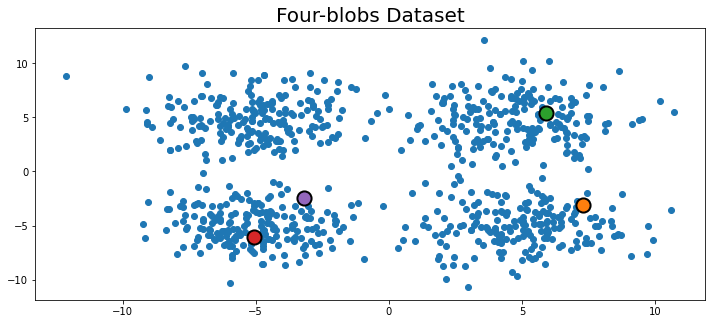

In [6]:
'plot dataset'
plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])
plt.title('Four-blobs Dataset',fontsize=20)

'plot the initial k means'
colors = ['C1', 'C2', 'C3', 'C4'] #
for i in range(k):
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black',
                label='mean '+str(i))



**Step 1:** Assign each point to the mean to which it is closest. 

In [7]:
dist = pairwise_distances(X,means)
dist

array([[12.14515321,  8.30861104, 10.70416413,  6.81377266],
       [10.26362333,  7.15796232, 10.07088705,  6.02752946],
       [19.71755   , 14.22985072, 16.02086449, 13.01361564],
       ...,
       [12.25308044, 15.6204183 ,  0.55435734,  3.98402252],
       [ 9.94675598, 13.0021905 ,  2.97842773,  2.11853339],
       [13.15458168, 16.98482774,  1.51499167,  5.43639236]])

In [8]:
clusters = np.argmin(dist, axis=1)
clusters

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

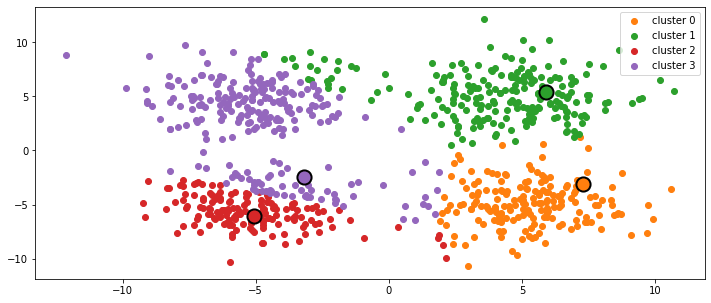

In [9]:
# plot clusters
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Step 2:** We update the cluster means 

In [10]:
# compute the mean (center) of each cluster; we'll use list comprehension
means = np.array([np.mean(X[clusters==i], axis=0) for i in range(k)])
means 

array([[ 5.27396287, -4.89079722],
       [ 3.97477927,  5.19150113],
       [-5.2159867 , -5.75842098],
       [-4.75724357,  2.46840378]])

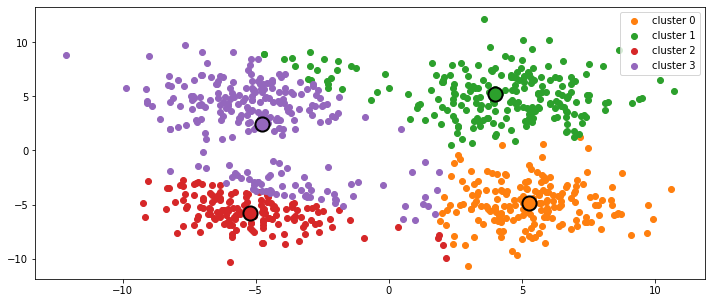

In [11]:
# plot clusters
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

We repeat steps 1 and 2 until the means (centers) stop moving.

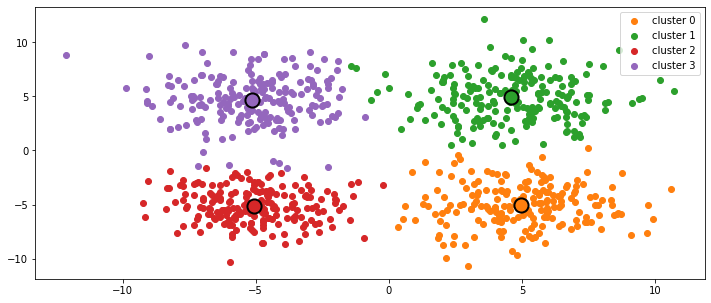

In [12]:
'repeat steps 1 and 2'

# step 1: assign each point to the closest mean
dist = pairwise_distances(X,means)
clusters = np.argmin(dist, axis=1)

# step 2: update cluster means
means = np.array([np.mean(X[clusters==i], axis=0) for i in range(k)])

# plot clusters
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Remark:** kmeans always converges in a finite number of steps (but not necessarily to the best solution)

## 2. k-means implementation

In [13]:
def kmeans(X,k,max_iterations=1000):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    return clusters, means

In [14]:
# check that it works 
k = 4
clusters, means = kmeans(X,k)

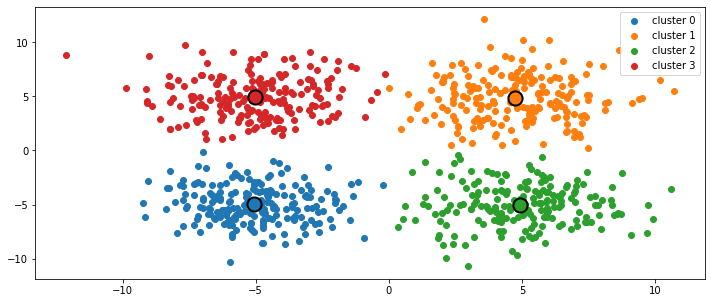

In [15]:
# plot clusters
plt.figure(figsize=(12,5))
colors = ['C'+str(i) for i in range(k)]
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

## 3. Inertia and other cluster metrics

### Inertia

The K-means algorithm aims to choose clusters that minimise the **inertia**, or within-cluster sum-of-squares criterion:

The **inertia** is the mean squared distance between each dataset point and its closest cluster mean.
If we denote by $C_i$ the $i$th cluster and by $m_i$ the center (the mean) of $C_i$, the inertia is given by
$$
\mbox{inertia} = \frac{1}{m}\sum_{i=1}^k \sum_{x\in C_i} \|x-m_i\|_2^2,
$$
where $m$ is the size of the dataset.

Inertia can be recognized as a measure of how internally coherent clusters are.
Lower inertia values are better and zero is optimal

In [16]:
def inertia(X,means,clusters,k):
    m = len(clusters)
    return np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m

In [17]:
inertia(X,means,clusters,k)

7.432435802958277

### Silhouette score

Another cluser metric is the silhouette score.
The **silhouette score** is the mean silhouette coefficient over all the dataset points.
For a datapont $x$ in cluster $C_i$, its **silhouette coefficient** is computed as follows.
First, we need to compute its mean distance to the other points in the same cluster:

$$
a = \frac{1}{\mbox{size cluster $C_i$ - 1}}\sum_{x_j\in C_i}\mathrm{distance}\,(x,x_j).
$$

We divide by $\mbox{size cluster $C_i$ - 1}$ because we do not include the distance from $x$ to itself.
Secondly, we compute the mean distance to the points of the next closest cluster:

$$
b = \min_{C_k\neq C_i}\left\{ \frac{1}{\mbox{size cluster $C_k$}}\sum_{x_j\in C_k}\mathrm{distance}\,(x,x_j)\right\}.
$$

The **silhouette coefficient** of $x_i$ is

$$
s = \left\{
\begin{array}{ll}
\dfrac{b-a}{\max\{a,b\}} & \mbox{ if size of $C_i$ is not equal to 1}, \\
0 & \mbox{ if size of $C_i$ is equal to 1}
\end{array}
\right.
$$

The silhouette coefficient can vary between -1 and 1. 
A coefficient close to 1 means that the point is well inside its own cluster and far from other clusters. A coefficient close to 0 means that it is close to a cluster boundary. A coefficient close to -1 means that the point may have been assigned to the wrong cluster.

In [18]:
# distance matrix
dist = pairwise_distances(X)

In [19]:
# cluster sizes
sizes = np.bincount(clusters)

In [20]:
#  intra-cluster distance
a = np.array([np.sum(dist[clusters == clusters[i],i])/(sizes[clusters[i]]-1) 
              if sizes[clusters[i]]>1 
              else 0
              for i in range(m)])

In [21]:
# mean nearest-cluster distance
b = np.array([np.min([np.mean(dist[clusters==j,i]) for j in range(k) if j!=clusters[i]]) for i in range(m)])

In [22]:
s = (b-a) / np.maximum(a,b)

In [23]:
def silhouettes(X,clusters,k):
    from sklearn.metrics import pairwise_distances
    # distance matrix
    dist = pairwise_distances(X)
    # cluster sizes
    sizes = np.bincount(clusters)
    #  intra-cluster distance
    a = np.array([np.sum(dist[clusters == clusters[i],i])/(sizes[clusters[i]]-1) 
              if sizes[clusters[i]]>1 
              else 0
              for i in range(m)])
    # mean nearest-cluster distance
    if k!=1: # two or more clusters
        b = np.array([np.min([np.mean(dist[clusters==j,i]) for j in range(k) if j!=clusters[i]]) for i in range(m)])
    else: #only one cluster
        b = np.zeros(m)
    # silhouettes coefficients
    s = (b-a) / np.maximum(a,b)
    return s

In [24]:
k = 4
clusters, means = kmeans(X,k)

In [25]:
# silhouette coefficients
s_coeffs = silhouettes(X,clusters,k)
# silhouette score
s_score = np.mean(s_coeffs)
s_score

0.6114542445573308

### Silhouette diagram

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram

In [26]:
def plot_silhouette_diagram(X,clusters,means,k,s_coeffs):
    from matplotlib.ticker import FixedLocator, FixedFormatter
    from matplotlib import cm
       
    # plot silhouette diagrams
    plt.figure(figsize=(15,10))
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = s_coeffs[clusters == i]
        coeffs.sort()
        color = cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coeffs)),0,coeffs,facecolor=color,edgecolor=color,alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    plt.axvline(x=np.mean(s_coeffs),color='red',linestyle='--')

In [27]:
k = 10
clusters, means = kmeans(X,k)

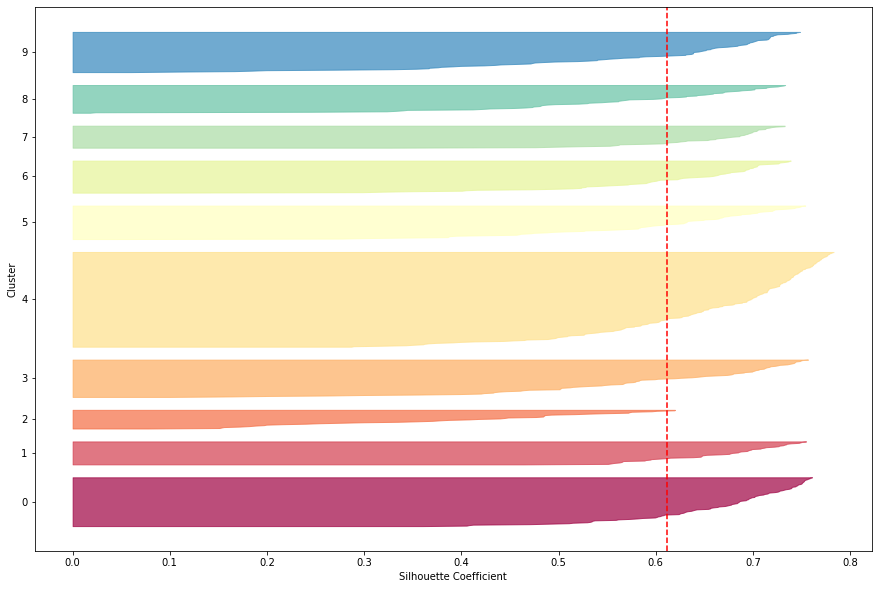

In [28]:
plot_silhouette_diagram(X,clusters,means,k,s_coeffs)

## 4. Finding the optimal number of clusters: the elbow method

So far, we have set the number of clusters k to 4 because it was obvious by looking at the data that this was the correct number of clusters.
But in general, it will not be so easy to know how to set 4, and the result might be quite bad if you set it to the wrong value.

As you can see below, setting k to 3 or 6 results in fairly bad clusters.

**Example 1:** when k is too small, separate clusters get merged

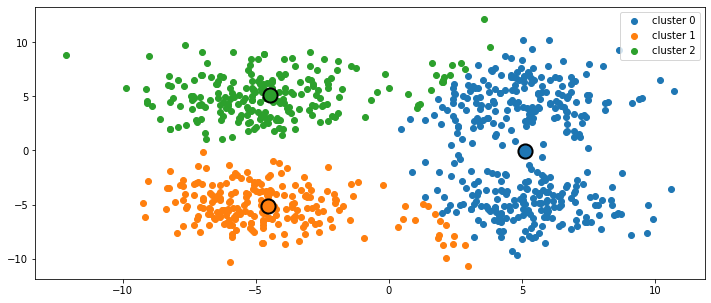

In [29]:
# run k-means
k = 3
clusters,means = kmeans(X,k)

# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Example 2:** when k is too large, some clusters get chopped into multiple pieces

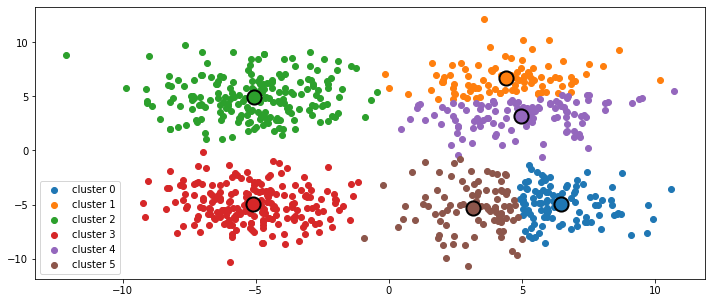

In [30]:
# run k-means
k = 6
clusters,means = kmeans(X,k)

# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

One way to choose the number of clusters is to run the k-means algorithm multiple times with different values for k, and plot the inertia as a function of k.

When plotting the inertia as a function of the number of clusters  k, the curve often contains an inflexion point called **the elbow**.

Text(0, 0.5, 'inertia')

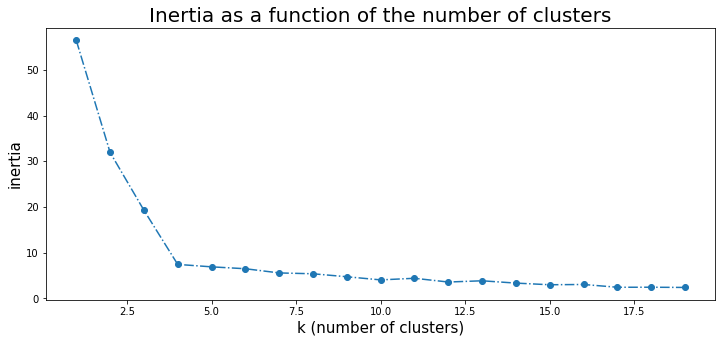

In [31]:
k_min = 1
k_max = 20
inertias = np.zeros(k_max-k_min)
for i,k in enumerate(range(k_min,k_max)):
    clusters,means = kmeans(X,k)
    inertias[i] = inertia(X,means,clusters,k)
    
plt.figure(figsize=(12,5))
plt.plot(range(k_min,k_max),inertias,'o-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

As you can see, the inertia drops very quickly as we increase k up to k=4, but then it decreases much more slowly as we keep increasing  k.
This curve has roughly the shape of an arm, and there is an elbow at k=4.
So, if we did not know better, k=4  would be a good choice: any lower value would be dramatic, while any higher value would not help much.

Text(0, 0.5, 'silhouette score')

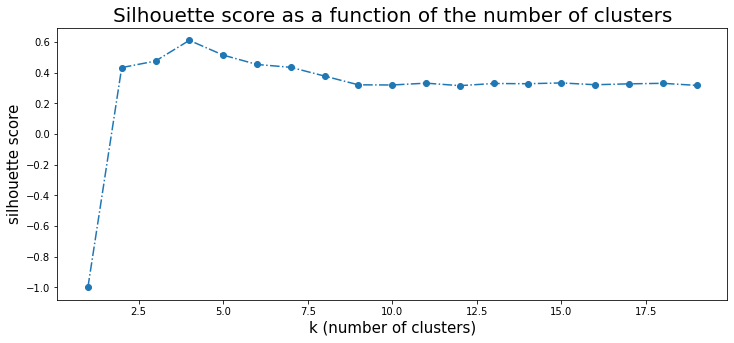

In [32]:
k_min = 1
k_max = 20
s_scores = np.zeros(k_max-k_min)
for i,k in enumerate(range(k_min,k_max)):
    clusters,means = kmeans(X,k)
    s_scores[i] = np.mean(silhouettes(X,clusters,k))
    
plt.figure(figsize=(12,5))
plt.plot(range(k_min,k_max),s_scores,'o-.')
plt.title('Silhouette score as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('silhouette score', fontsize=15)

## 5. Demonstration of k-means assumptions

The k-means algorithm makes the assumption that clusters are [**convex**](https://en.wikipedia.org/wiki/Convex_set) and [**isotropic**](https://en.wikipedia.org/wiki/Isotropy), which is not always the case. It responds poorly to elongated clusters, or clusters with irregular shapes.

The following examples are meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters

**Example 1:** Anisotropicly distributed data (i.e., elongated clusters)

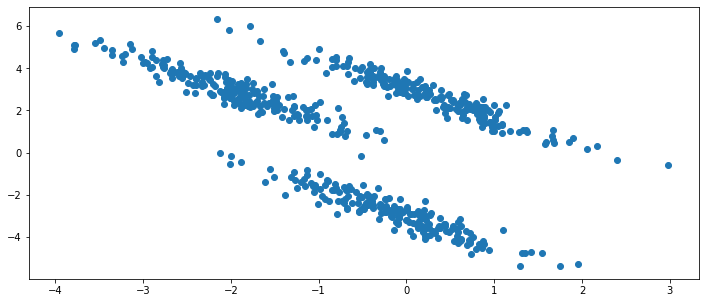

In [33]:
# three-elongated-blobs dataset

X = np.zeros([600,2])
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])

X[0:200] = np.random.randn(200,2) + [-2,2]
X[200:400] = np.random.randn(200,2) + [5,7]
X[400:600] = np.random.randn(200,2) + [-5,-7]

X = X.dot(transformation)
plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

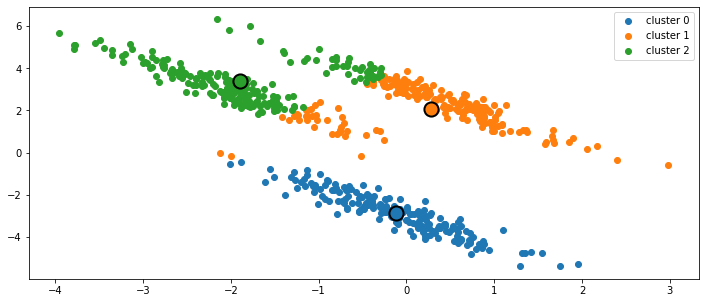

In [34]:
k = 3
clusters,means = kmeans(X,k)
# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Example 2:** Clusters with irregular shapes.

**Moons dataset**

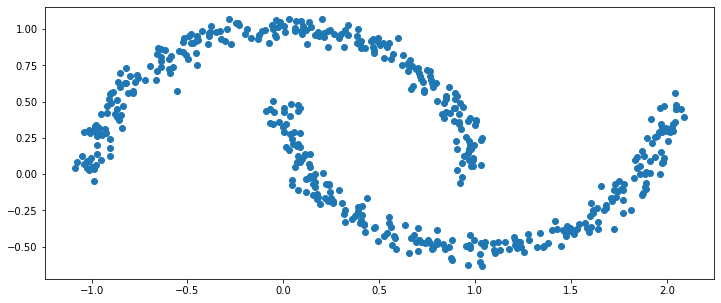

In [35]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.05)

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

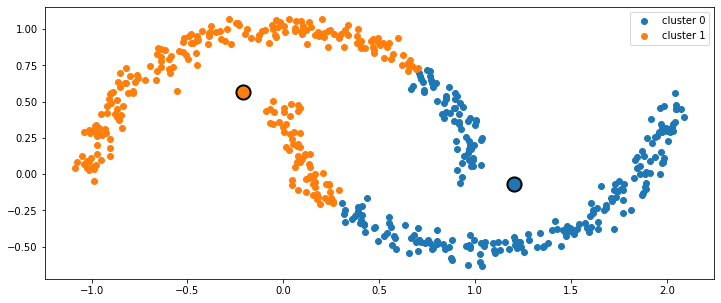

In [36]:
k = 2
clusters,means = kmeans(X,k)
# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Circles dataset**

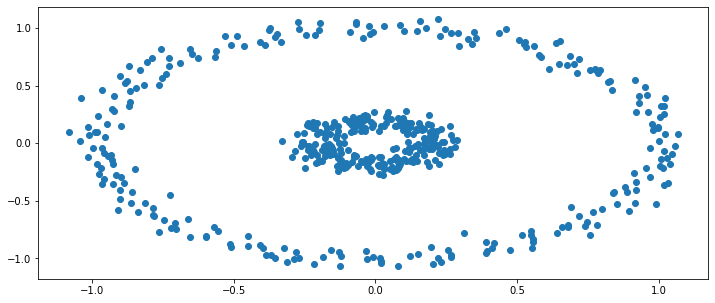

In [37]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)


plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

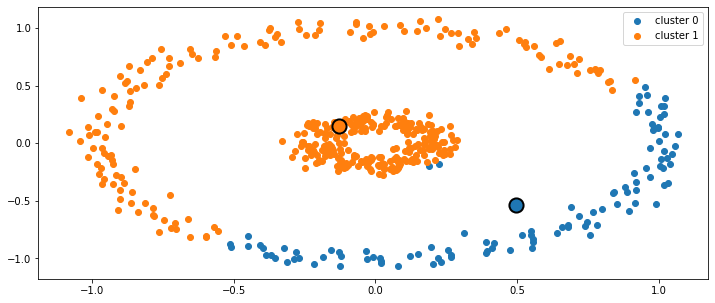

In [38]:
k = 2
clusters,means = kmeans(X,k)
# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

**Example 3:** Unevenly sized clusters

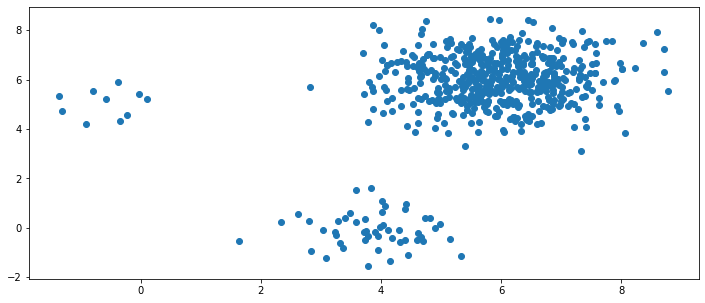

In [39]:
X = np.zeros((560,2)) 
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:550] = 0.7*np.random.randn(50,2) + [4,0] # blob 2 (medium)
X[550:560] = 0.5*np.random.randn(10,2) + [0,5] # blob 3 (small)

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

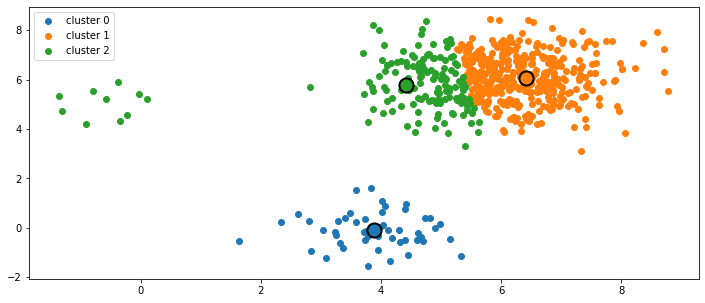

In [40]:
k = 3
clusters,means = kmeans(X,k)
# plot clusters
colors = ['C'+str(i) for i in range(k)]
plt.figure(figsize=(12,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()